# 1.Data Wragling

In [1]:
## Import Libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import math
from math import radians, sin, cos, sqrt, atan2

##### Import Data & Merge into one datasoure

Data Source:
https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z/explore and https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8

In [3]:
crime_data1 = pd.read_csv('../data/raw/Crime_Data_from_2010_to_2019.csv')
crime_data2 = pd.read_csv('../data/raw/Crime_Data_from_2020_to_Present.csv')
print(crime_data1.info())
print(crime_data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135573 entries, 0 to 2135572
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

Both dataframes context are identical, so it will be merge into one data frame

In [4]:
# Make all columns to upper case and remove space
crime_data1.columns = crime_data1.columns.str.upper().str.strip()
crime_data2.columns = crime_data2.columns.str.upper().str.strip()

# Concatenate them vertically (along rows)
crime_data = pd.concat([crime_data1, crime_data2], ignore_index=True)

In [5]:
crime_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924340 entries, 0 to 2924339
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   DATE RPTD       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   RPT DIST NO     int64  
 7   PART 1-2        int64  
 8   CRM CD          int64  
 9   CRM CD DESC     object 
 10  MOCODES         object 
 11  VICT AGE        int64  
 12  VICT SEX        object 
 13  VICT DESCENT    object 
 14  PREMIS CD       float64
 15  PREMIS DESC     object 
 16  WEAPON USED CD  float64
 17  WEAPON DESC     object 
 18  STATUS          object 
 19  STATUS DESC     object 
 20  CRM CD 1        float64
 21  CRM CD 2        float64
 22  CRM CD 3        float64
 23  CRM CD 4        float64
 24  LOCATION        object 
 25  CROSS STREET    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

In [6]:
crime_data.reset_index()

,index,DR_NO,DATE RPTD,DATE OCC,TIME OCC,AREA,AREA NAME,RPT DIST NO,PART 1-2,CRM CD,...,STATUS,STATUS DESC,CRM CD 1,CRM CD 2,CRM CD 3,CRM CD 4,LOCATION,CROSS STREET,LAT,LON
0,0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924335,2924335,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
2924336,2924336,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
2924337,2924337,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
2924338,2924338,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


## Explore Data

Number Of Missing Values By Column

In [7]:
missing_crime= pd.concat([crime_data.isnull().sum(), 100 * crime_data.isnull().mean()], axis=1)
missing_crime.columns=['count', '%']
missing_crime.sort_values(by=['count'])

,count,%
DR_NO,0,0.000000
LOCATION,0,0.000000
STATUS DESC,0,0.000000
LAT,0,0.000000
VICT AGE,0,0.000000
CRM CD DESC,0,0.000000
CRM CD,0,0.000000
LON,0,0.000000
RPT DIST NO,0,0.000000
AREA NAME,0,0.000000


##### Handling Missing data

In [8]:
# Fill missing values
crime_data['MOCODES'].fillna('', inplace=True)
crime_data['VICT SEX'].fillna('Unknown', inplace=True)
crime_data['VICT DESCENT'].fillna('Unknown', inplace=True)
crime_data['PREMIS DESC'].fillna('Unknown', inplace=True)
crime_data['WEAPON DESC'].fillna('None', inplace=True)
crime_data['CRM CD 1'].fillna(-1, inplace=True)


# Extract month, day, and year from crime data

crime_data['DATE RPTD'] = pd.to_datetime(crime_data['DATE RPTD'])
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

crime_data['MTH_RPTD'] = crime_data['DATE RPTD'].dt.month
crime_data['DAY_RPTD'] = crime_data['DATE RPTD'].dt.day
crime_data['YEAR_RPTD'] = crime_data['DATE RPTD'].dt.year

crime_data['MTH_OCC'] = crime_data['DATE OCC'].dt.month
crime_data['DAY_OCC'] = crime_data['DATE OCC'].dt.day
crime_data['YEAR_OCC'] = crime_data['DATE OCC'].dt.year


##### For crime data, need only location , type of crime & crime date rough timing . the rest of the columns shall be dropped.

In [9]:
columns_to_drop_crime= ['DR_NO', 'CROSS STREET','CRM CD 2', 'CRM CD 3', 'CRM CD 4']
crime_data.drop(columns=columns_to_drop_crime, inplace=True)

##### Check if there is any duplicate records after removing raw data unique IDs

In [10]:
#Remove dupliate and keep as new cleaned dataframes
crime_data= crime_data.drop_duplicates(keep='last')

##### Remove space from column names

In [11]:
# Replace spaces with underscores
crime_data.columns = [col.replace(' ', '_') for col in crime_data.columns]

##### Add ID column sort by index

In [13]:
# Sort DataFrame by date column
crime_data = crime_data.sort_values(by='DATE_OCC')

# Reset index if needed
crime_data = crime_data.reset_index(drop=True)

# Add index+1 as ID column
crime_data['ID'] = crime_data.index + 1


In [14]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865898 entries, 0 to 2865897
Data columns (total 30 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DATE_RPTD       datetime64[ns]
 1   DATE_OCC        datetime64[ns]
 2   TIME_OCC        int64         
 3   AREA            int64         
 4   AREA_NAME       object        
 5   RPT_DIST_NO     int64         
 6   PART_1-2        int64         
 7   CRM_CD          int64         
 8   CRM_CD_DESC     object        
 9   MOCODES         object        
 10  VICT_AGE        int64         
 11  VICT_SEX        object        
 12  VICT_DESCENT    object        
 13  PREMIS_CD       float64       
 14  PREMIS_DESC     object        
 15  WEAPON_USED_CD  float64       
 16  WEAPON_DESC     object        
 17  STATUS          object        
 18  STATUS_DESC     object        
 19  CRM_CD_1        float64       
 20  LOCATION        object        
 21  LAT             float64       
 22  LON             fl

## Categorial Features

In [15]:
crime_data.select_dtypes('object')

,AREA_NAME,CRM_CD_DESC,MOCODES,VICT_SEX,VICT_DESCENT,PREMIS_DESC,WEAPON_DESC,STATUS,STATUS_DESC,LOCATION
0,Topanga,THEFT OF IDENTITY,0377,F,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",None,IC,Invest Cont,22100 BURBANK BL
1,Northeast,THEFT OF IDENTITY,,F,H,SINGLE FAMILY DWELLING,None,IC,Invest Cont,2700 LYTELLE PL
2,Topanga,ORAL COPULATION,1258 0512,M,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",JA,Juv Arrest,7200 ETON AV
3,Olympic,THEFT OF IDENTITY,0100 1822 0917,M,K,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",None,IC,Invest Cont,4800 ELMWOOD AV
4,Topanga,DISTURBING THE PEACE,1501,F,W,SINGLE FAMILY DWELLING,None,IC,Invest Cont,7400 KELVIN AV
...,...,...,...,...,...,...,...,...,...,...
2865893,Van Nuys,BURGLARY,0325 1402 1609,F,W,RESTAURANT/FAST FOOD,None,IC,Invest Cont,4500 VAN NUYS BL
2865894,Northeast,BATTERY - SIMPLE ASSAULT,1259 1251 0416 0419 0429 0305 1309 0326,Unknown,Unknown,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1200 N AVE 54
2865895,Newton,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0913 0416 1309 0432,F,H,YARD (RESIDENTIAL/BUSINESS),BOTTLE,IC,Invest Cont,1500 E 42ND ST
2865896,Central,BURGLARY FROM VEHICLE,1402 1307 0344 0329,Unknown,Unknown,STREET,None,IC,Invest Cont,5TH


In [16]:
#Lets emphasize on Location ( Area and City) from both datasets
crime_data['AREA_NAME'].value_counts()

77th Street    194790
Southwest      179068
Pacific        157989
N Hollywood    152643
Central        150896
Southeast      148336
Hollywood      140524
Newton         139027
Northeast      133937
Van Nuys       132783
Devonshire     127860
Olympic        126272
Rampart        125856
Wilshire       125638
Mission        125019
West LA        124915
Harbor         124164
West Valley    122280
Topanga        120860
Hollenbeck     107251
Foothill       105790
Name: AREA_NAME, dtype: int64

## Review distribution

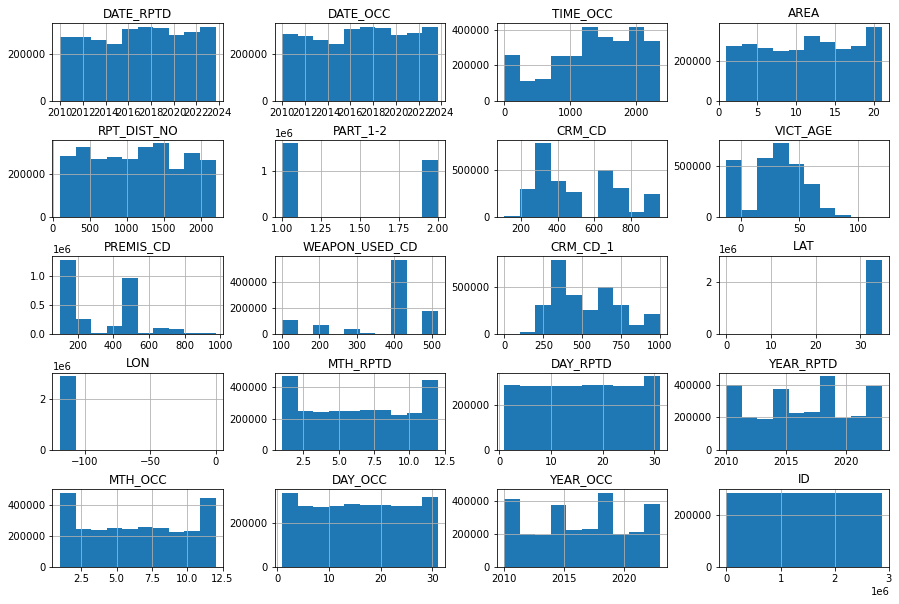

In [17]:
crime_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

## Distribution Features

#### Distribution Of Cimes By Area

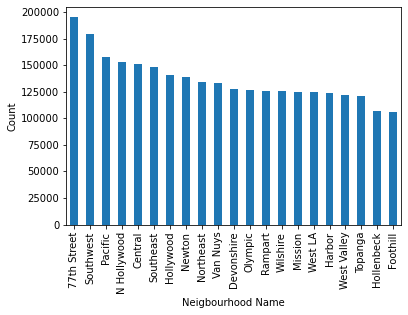

In [18]:
crime_data['AREA_NAME'].value_counts().plot(kind='bar')
plt.xlabel('Neigbourhood Name')
plt.ylabel('Count')
plt.show()

#### Distribution Of Crimes by Crime Description

In [19]:
crime_data['CRM_CD_DESC'].value_counts()

BATTERY - SIMPLE ASSAULT                                   249697
VEHICLE - STOLEN                                           240082
BURGLARY FROM VEHICLE                                      208545
BURGLARY                                                   192831
THEFT PLAIN - PETTY ($950 & UNDER)                         187623
                                                            ...  
TILL TAP - ATTEMPT                                              4
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              4
TRAIN WRECKING                                                  2
DRUNK ROLL - ATTEMPT                                            1
FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)         1
Name: CRM_CD_DESC, Length: 143, dtype: int64

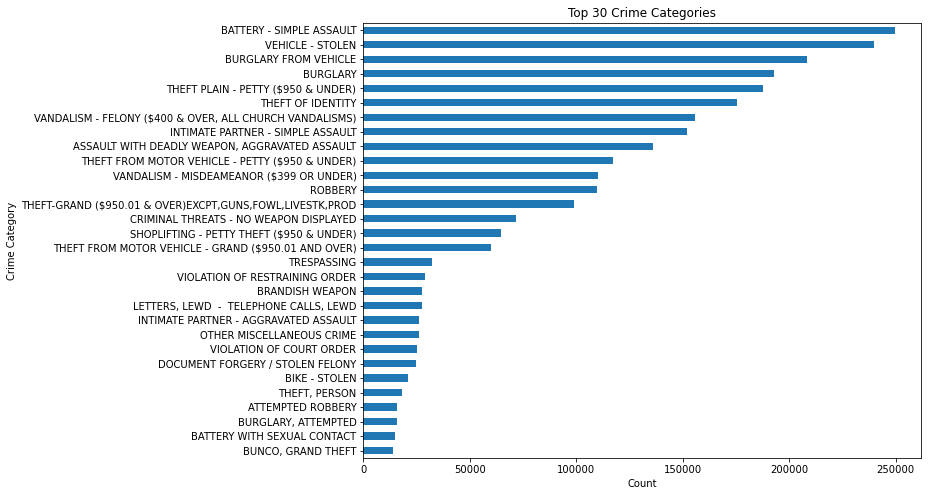

In [20]:
# Get the top 30 crime categories by value counts
top_30_crimes = crime_data['CRM_CD_DESC'].value_counts().head(30)

# Create the bar graph
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
top_30_crimes.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Crime Category')
plt.title('Top 30 Crime Categories')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most frequent crimes at the top
plt.show()

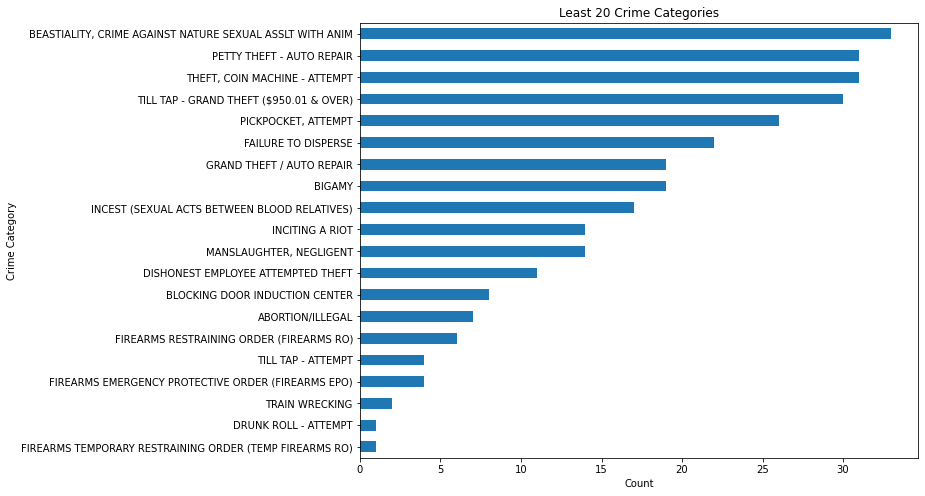

In [21]:
# Get the least crime categories by value counts
least_20_crimes = crime_data['CRM_CD_DESC'].value_counts().tail(20)

# Create the bar graph
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
least_20_crimes.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Crime Category')
plt.title('Least 20 Crime Categories')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most frequent crimes at the top
plt.show()

#### Crime occurance frequency by Area & Type (2010 to Sep 2023)

In [22]:
#Code task 14#
# Calculate  count of crime type by area sort by the average of the two

crime_area_type_count = crime_data.groupby(['AREA_NAME', 'CRM_CD_DESC']).size().reset_index(name='CRIME_COUNT')
sorted_crime_area_type_count = crime_area_type_count.sort_values(by='CRIME_COUNT', ascending=False)
print(crime_area_type_count.head(5))
print(crime_area_type_count.describe().T)

     AREA_NAME                                     CRM_CD_DESC  CRIME_COUNT
0  77th Street                                           ARSON          526
1  77th Street    ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER          190
2  77th Street  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        16701
3  77th Street                               ATTEMPTED ROBBERY         1725
4  77th Street                        BATTERY - SIMPLE ASSAULT        18829
              count         mean          std  min   25%   50%    75%      max
CRIME_COUNT  2687.0  1066.579084  2595.519266  1.0  12.5  85.0  478.5  20493.0


#### Data Distrubution based on occurance date

2023 is not ended yet, so data on 2023 figure is not reliable. However, 2022 is the highest crime rate.

   YEAR_OCC  CRIME_COUNT
0      2010       208695
1      2011       200300
2      2012       201297
3      2013       192367
4      2014       157470
             count      mean           std       min        25%       50%  \
YEAR_OCC      14.0    2016.5      4.183300    2010.0    2013.25    2016.5   
CRIME_COUNT   14.0  204707.0  26010.283765  145765.0  199115.75  208744.5   

                   75%       max  
YEAR_OCC       2019.75    2023.0  
CRIME_COUNT  223562.75  233425.0  


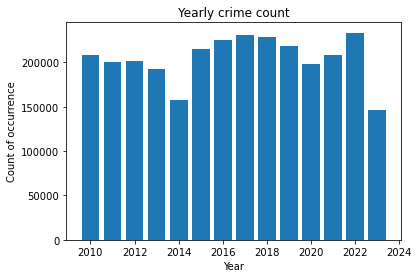

In [23]:
crime_count_by_occ = crime_data.groupby(['YEAR_OCC']).size().reset_index(name='CRIME_COUNT')
print(crime_count_by_occ.head(5))
print(crime_count_by_occ.describe().T)


# Create a bar plot
plt.bar(crime_count_by_occ['YEAR_OCC'], crime_count_by_occ['CRIME_COUNT'])
plt.xlabel('Year')
plt.ylabel('Count of occurrence')
plt.title('Yearly crime count')
#plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.show()


##### Since 2024 data is not for full year, only for 8 months data, the figure is incorrect. As for data consistancy, remove all 2024 crimes data.Hence, the final cleaned data range is from 2010 to 2022.

In [24]:
crime_data = crime_data[crime_data['YEAR_OCC'] != 2024]

##### What day of the week is the highest crime occurance ?

Friday is the highest occurance of crimes.However,the rest of the days are relatively similar in volumns. There is the significant difference.

  WEEKDAY_OCC  CRIME_COUNT
0      Friday       439981
1      Monday       408020
2    Saturday       413875
3      Sunday       396331
4    Thursday       403980
5     Tuesday       399071
6   Wednesday       404640
             count      mean          std       min       25%       50%  \
CRIME_COUNT    7.0  409414.0  14643.81107  396331.0  401525.5  404640.0   

                  75%       max  
CRIME_COUNT  410947.5  439981.0  


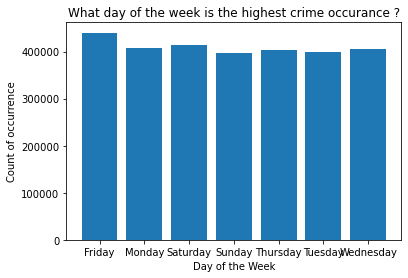

In [26]:
crime_data.loc[:, 'WEEKDAY_OCC'] = crime_data['DATE_OCC'].dt.strftime('%A')


crime_count_by_weekday = crime_data.groupby(['WEEKDAY_OCC']).size().reset_index(name='CRIME_COUNT')
print(crime_count_by_weekday.head(7))
print(crime_count_by_weekday.describe().T)


# Create a bar plot
plt.bar(crime_count_by_weekday['WEEKDAY_OCC'], crime_count_by_weekday['CRIME_COUNT'])
plt.xlabel('Day of the Week')
plt.ylabel('Count of occurrence')
plt.title('What day of the week is the highest crime occurance ?')
#plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.show()


## Save data for stastical data exploration( EDA)

In [27]:
crime_data.shape

(2865898, 31)

In [28]:
# Specify the file path where you want to save the CSV file
file_path = "../data/interim/" + "crime_data.csv"

# Save the DataFrame to a CSV file
crime_data.to_csv(file_path, index=False)  # Set index=False to exclude the DataFrame index in the CSV file

In [ ]:
# Specify the file path where you want to save the CSV file
file_path = "../data/interim/" + "top_10_crime_data.csv"

# Save the DataFrame to a CSV file
crime_data.to_csv(file_path, index=False)  # Set index=False to exclude the DataFrame index in the CSV file